<a href="https://www.kaggle.com/code/cemilaltay/wind-power-prediction-with-xgbregressor?scriptVersionId=160906564" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wind-power-forecasting/Turbine_Data.csv


In [2]:
#import libraries
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
import xgboost as xgb
import missingno as msno

# TASK 1 : Load and EDA 

In [3]:
df = pd.read_csv('../input/wind-power-forecasting/Turbine_Data.csv')

In [4]:
df.head()

,Unnamed: 0,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
0,2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
1,2017-12-31 00:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2,2017-12-31 00:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
3,2017-12-31 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
4,2017-12-31 00:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN


In [5]:
df.tail()

,Unnamed: 0,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
118219,2020-03-30 23:10:00+00:00,70.044465,27.523741,45.711129,1.515669,1.950088,1.950088,0.0,59.821165,55.193793,...,58.148777,39.008931,36.476562,178.0,13.775785,9.234004,2.0,G01,178.0,3.533445
118220,2020-03-30 23:20:00+00:00,40.833474,27.602882,45.598573,1.702809,2.136732,2.136732,0.0,59.142038,54.798545,...,57.550367,39.006759,36.328125,178.0,8.088928,9.229370,2.0,G01,178.0,3.261231
118221,2020-03-30 23:30:00+00:00,20.777790,27.560925,45.462045,1.706214,2.139664,2.139664,0.0,58.439439,54.380456,...,57.099335,39.003815,36.131944,178.0,4.355978,9.236802,2.0,G01,178.0,3.331839
118222,2020-03-30 23:40:00+00:00,62.091039,27.810472,45.343827,1.575352,2.009781,2.009781,0.0,58.205413,54.079014,...,56.847239,39.003815,36.007805,190.0,12.018077,9.237374,2.0,G01,190.0,3.284468
118223,2020-03-30 23:50:00+00:00,68.664425,27.915828,45.231610,1.499323,1.933124,1.933124,0.0,58.581716,54.080505,...,56.741040,39.003815,35.914062,203.0,14.439669,9.235532,2.0,G01,203.0,3.475205


In [6]:
df.isna().sum()

Unnamed: 0                          0
ActivePower                     23474
AmbientTemperatue               24407
BearingShaftTemperature         55706
Blade1PitchAngle                76228
Blade2PitchAngle                76333
Blade3PitchAngle                76333
ControlBoxTemperature           56064
GearboxBearingTemperature       55684
GearboxOilTemperature           55786
GeneratorRPM                    55929
GeneratorWinding1Temperature    55797
GeneratorWinding2Temperature    55775
HubTemperature                  55818
MainBoxTemperature              55717
NacellePosition                 45946
ReactivePower                   23476
RotorRPM                        56097
TurbineStatus                   55316
WTG                                 0
WindDirection                   45946
WindSpeed                       23629
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118224 entries, 0 to 118223
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    118224 non-null  object 
 1   ActivePower                   94750 non-null   float64
 2   AmbientTemperatue             93817 non-null   float64
 3   BearingShaftTemperature       62518 non-null   float64
 4   Blade1PitchAngle              41996 non-null   float64
 5   Blade2PitchAngle              41891 non-null   float64
 6   Blade3PitchAngle              41891 non-null   float64
 7   ControlBoxTemperature         62160 non-null   float64
 8   GearboxBearingTemperature     62540 non-null   float64
 9   GearboxOilTemperature         62438 non-null   float64
 10  GeneratorRPM                  62295 non-null   float64
 11  GeneratorWinding1Temperature  62427 non-null   float64
 12  GeneratorWinding2Temperature  62449 non-null

In [8]:
df.nunique()

Unnamed: 0                      118224
ActivePower                      94084
AmbientTemperatue                93678
BearingShaftTemperature          62286
Blade1PitchAngle                 38946
Blade2PitchAngle                 39021
Blade3PitchAngle                 39021
ControlBoxTemperature                1
GearboxBearingTemperature        62313
GearboxOilTemperature            62412
GeneratorRPM                     61074
GeneratorWinding1Temperature     62406
GeneratorWinding2Temperature     62424
HubTemperature                   38119
MainBoxTemperature               49145
NacellePosition                   6664
ReactivePower                    94040
RotorRPM                         59254
TurbineStatus                      353
WTG                                  1
WindDirection                     6664
WindSpeed                        94224
dtype: int64

In [9]:
df = df.drop_duplicates()

<Axes: >

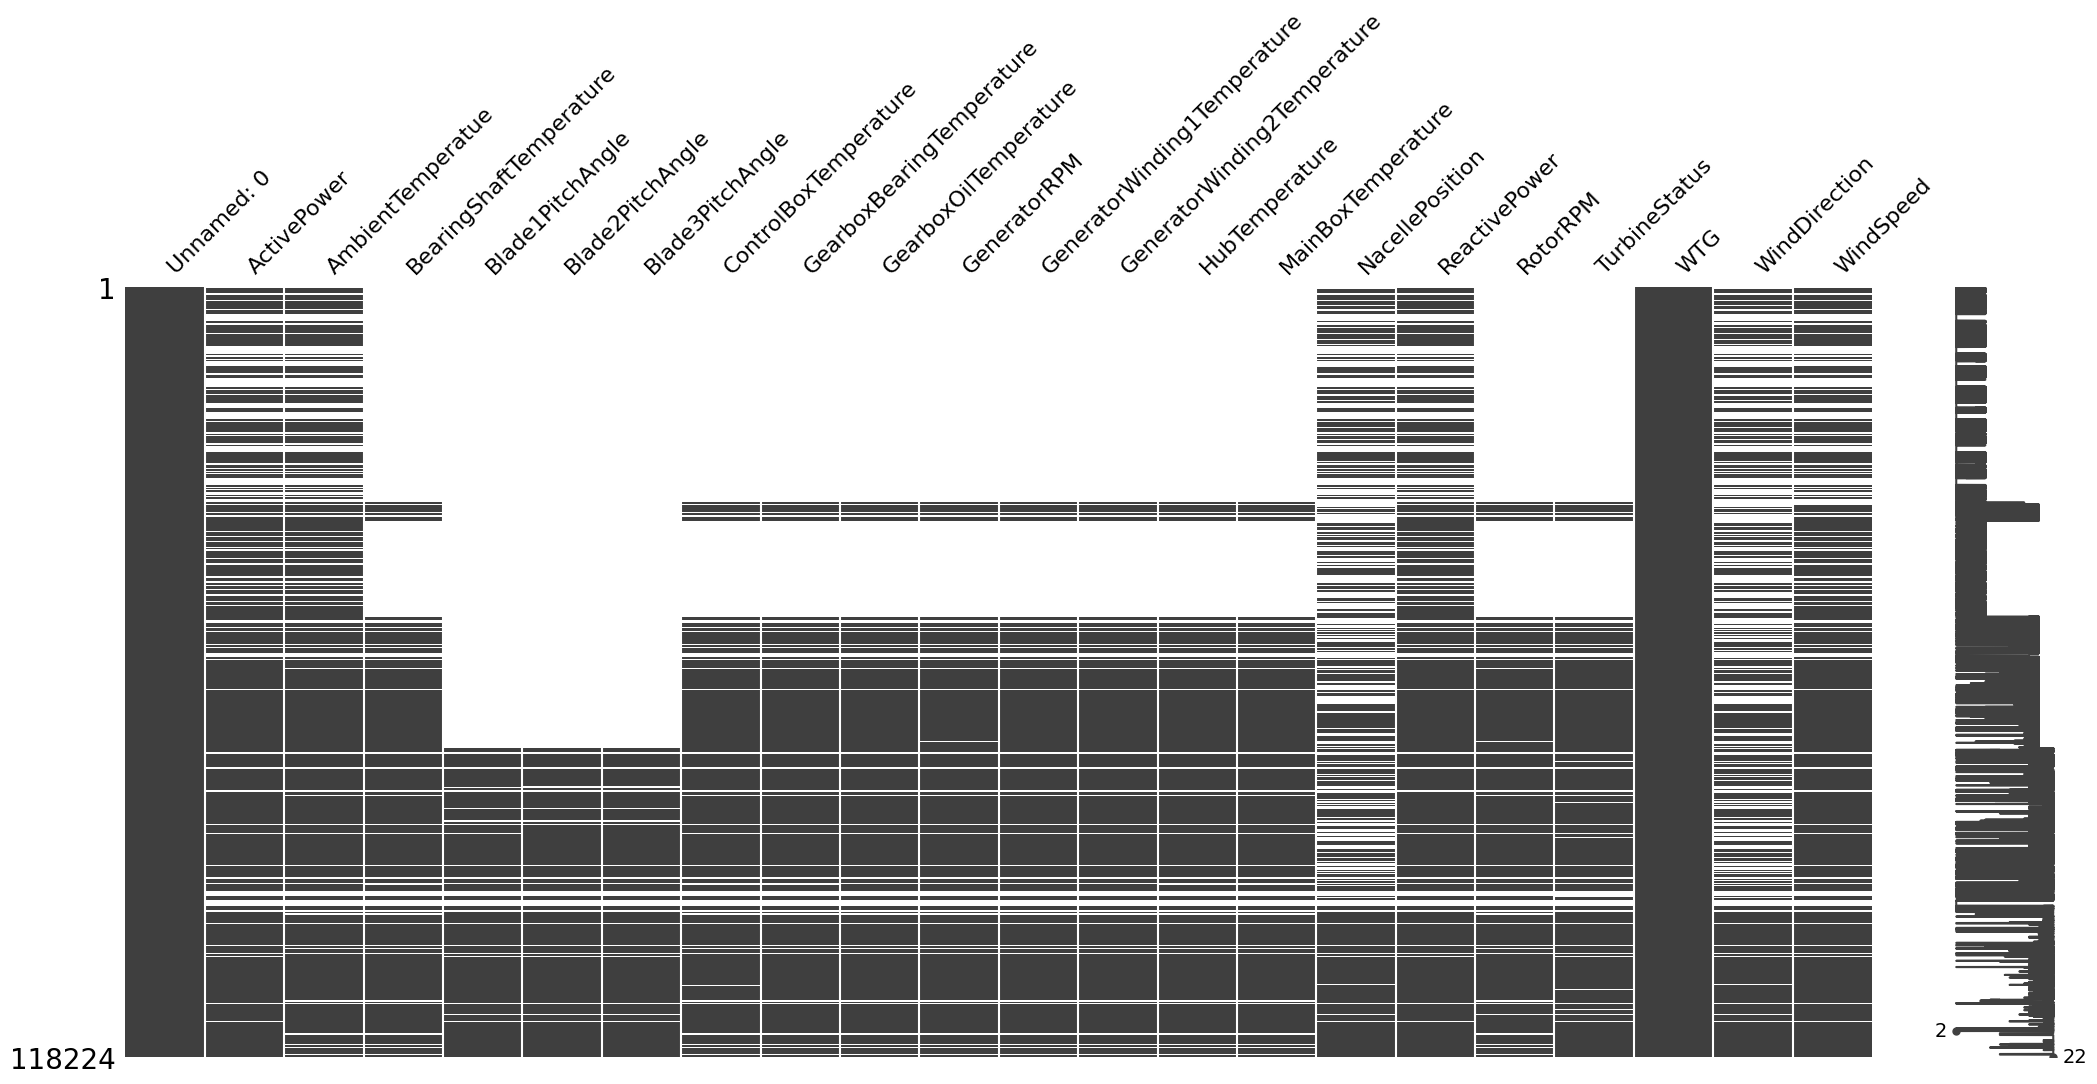

In [10]:
msno.matrix(df)

# TASK 2 : Data Preprocessing and Visualization

In [11]:
#We can drop unnecessary features WTG, ControlBoxTemperature cause of their unique=1
df = df.drop(["ControlBoxTemperature","WTG"],axis=1)

In [12]:
#suppression of aberrant values
df = df[df["ActivePower"]>0]

In [13]:
df.isna().sum()

Unnamed: 0                          0
ActivePower                         0
AmbientTemperatue                1030
BearingShaftTemperature         26822
Blade1PitchAngle                43265
Blade2PitchAngle                43348
Blade3PitchAngle                43348
GearboxBearingTemperature       26820
GearboxOilTemperature           26811
GeneratorRPM                    26810
GeneratorWinding1Temperature    26798
GeneratorWinding2Temperature    26791
HubTemperature                  26930
MainBoxTemperature              26841
NacellePosition                 20423
ReactivePower                      42
RotorRPM                        26806
TurbineStatus                   26467
WindDirection                   20423
WindSpeed                         305
dtype: int64

In [14]:
df["Unnamed: 0"]=pd.to_datetime(df["Unnamed: 0"])

In [15]:
df.corr().sort_values("ActivePower",ascending=False)["ActivePower"]

ActivePower                     1.000000
RotorRPM                        0.965013
GeneratorRPM                    0.963219
WindSpeed                       0.939210
GeneratorWinding2Temperature    0.930053
GeneratorWinding1Temperature    0.928999
GearboxOilTemperature           0.854296
GearboxBearingTemperature       0.810595
ReactivePower                   0.661130
BearingShaftTemperature         0.633024
HubTemperature                  0.358849
MainBoxTemperature              0.224130
Blade3PitchAngle                0.197264
Blade2PitchAngle                0.197264
Blade1PitchAngle                0.194281
NacellePosition                 0.024480
WindDirection                   0.024480
AmbientTemperatue               0.011755
TurbineStatus                  -0.000739
Unnamed: 0                     -0.036942
Name: ActivePower, dtype: float64

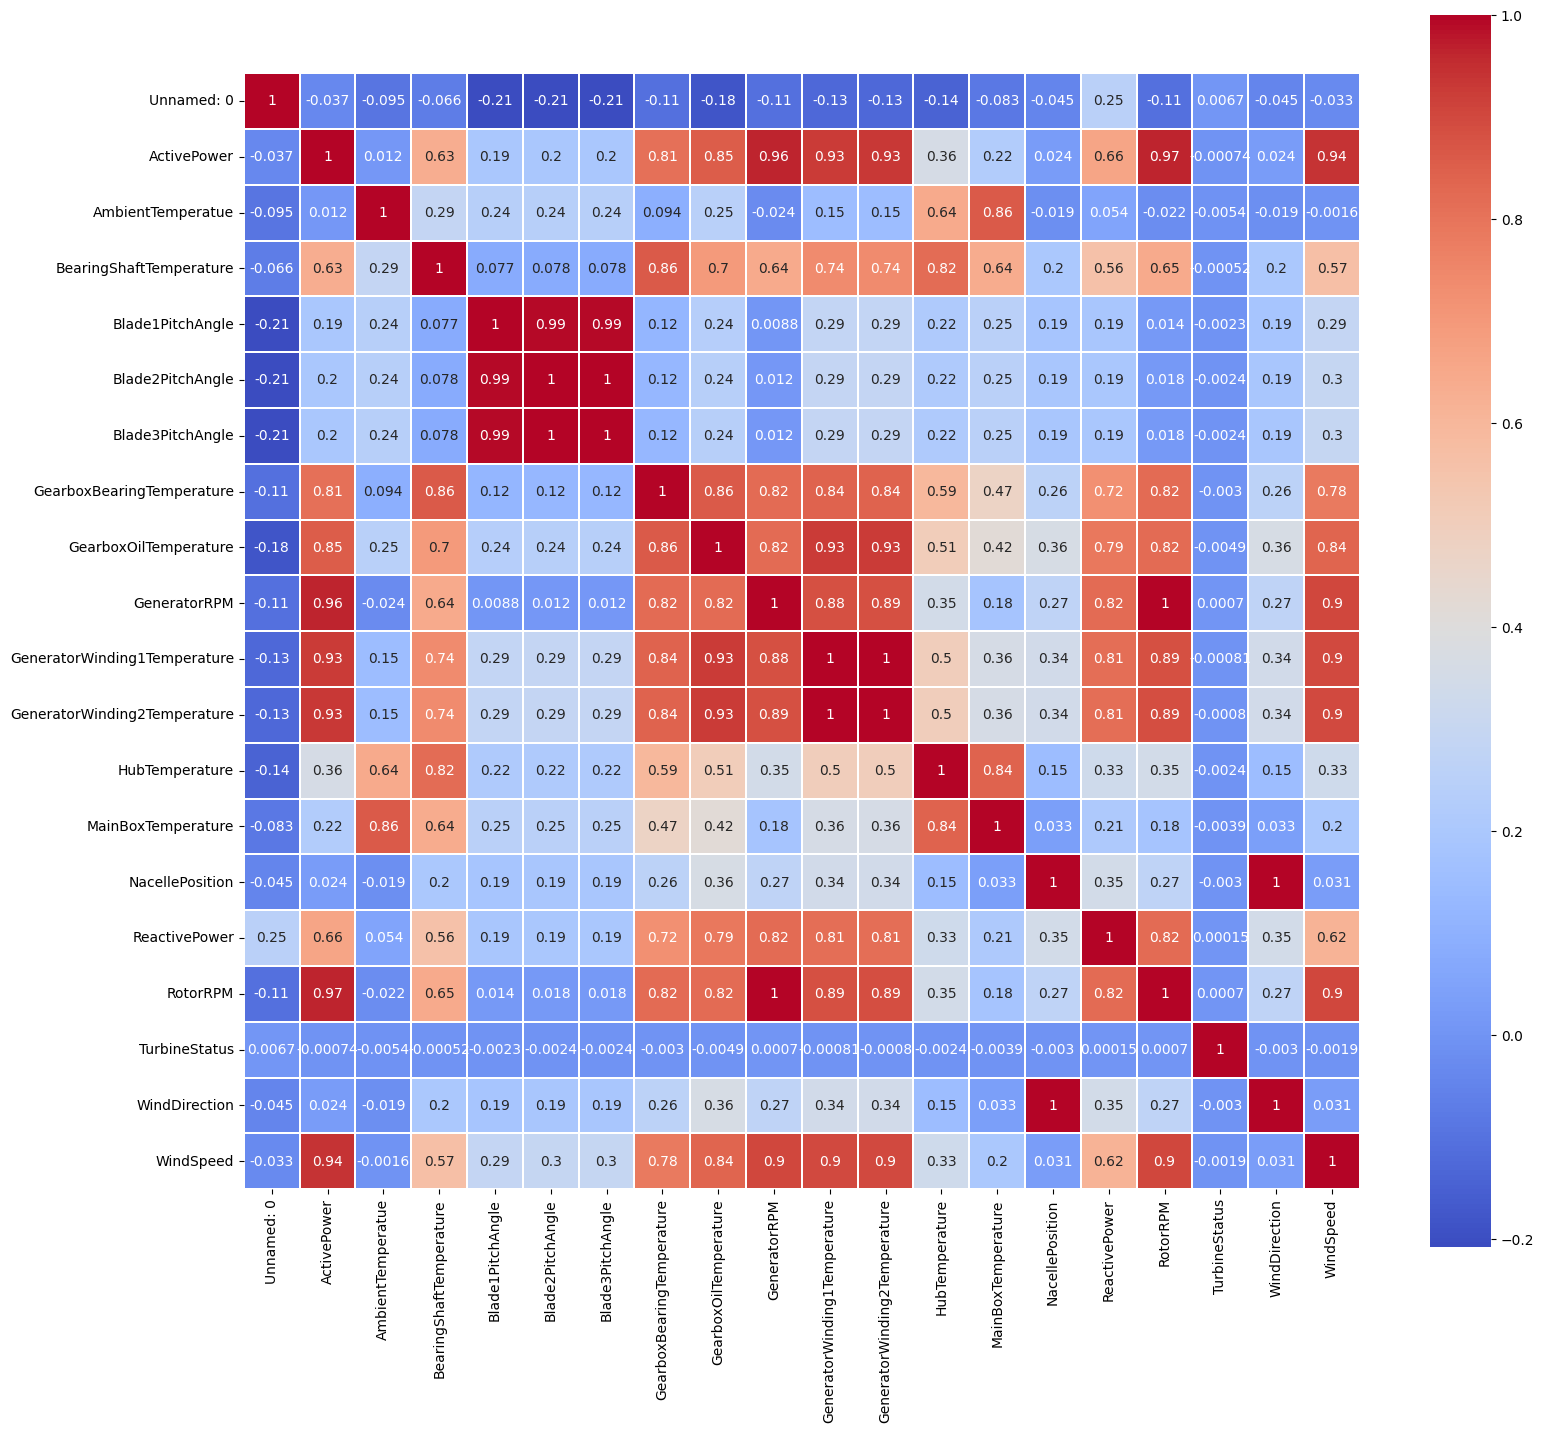

In [16]:
plt.figure(figsize=(18,16))
sns.heatmap(df.corr(),square=True,annot=True,linewidths=0.1,cmap="coolwarm")
plt.show()

In [17]:
# df.columns
corr = ['Unnamed: 0', 'ActivePower', 'GearboxBearingTemperature',
       'GearboxOilTemperature', 'GeneratorRPM', 'GeneratorWinding1Temperature',
       'GeneratorWinding2Temperature', 'ReactivePower','RotorRPM','WindSpeed']
df_corr = df[corr]

In [18]:
# After this step our aim is strong correlation with active power columns (more than 0.6)
df_corr.head()

,Unnamed: 0,ActivePower,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,ReactivePower,RotorRPM,WindSpeed
182,2018-01-01 06:20:00+00:00,26.212347,NaN,NaN,NaN,NaN,NaN,3.976499,NaN,3.042750
184,2018-01-01 06:40:00+00:00,59.632658,NaN,NaN,NaN,NaN,NaN,11.091660,NaN,3.424814
185,2018-01-01 06:50:00+00:00,40.889650,NaN,NaN,NaN,NaN,NaN,4.234497,NaN,3.507172
208,2018-01-01 10:40:00+00:00,34.398111,NaN,NaN,NaN,NaN,NaN,5.347792,NaN,3.442212
216,2018-01-01 12:00:00+00:00,29.797653,NaN,NaN,NaN,NaN,NaN,6.022326,NaN,3.031363


<Axes: >

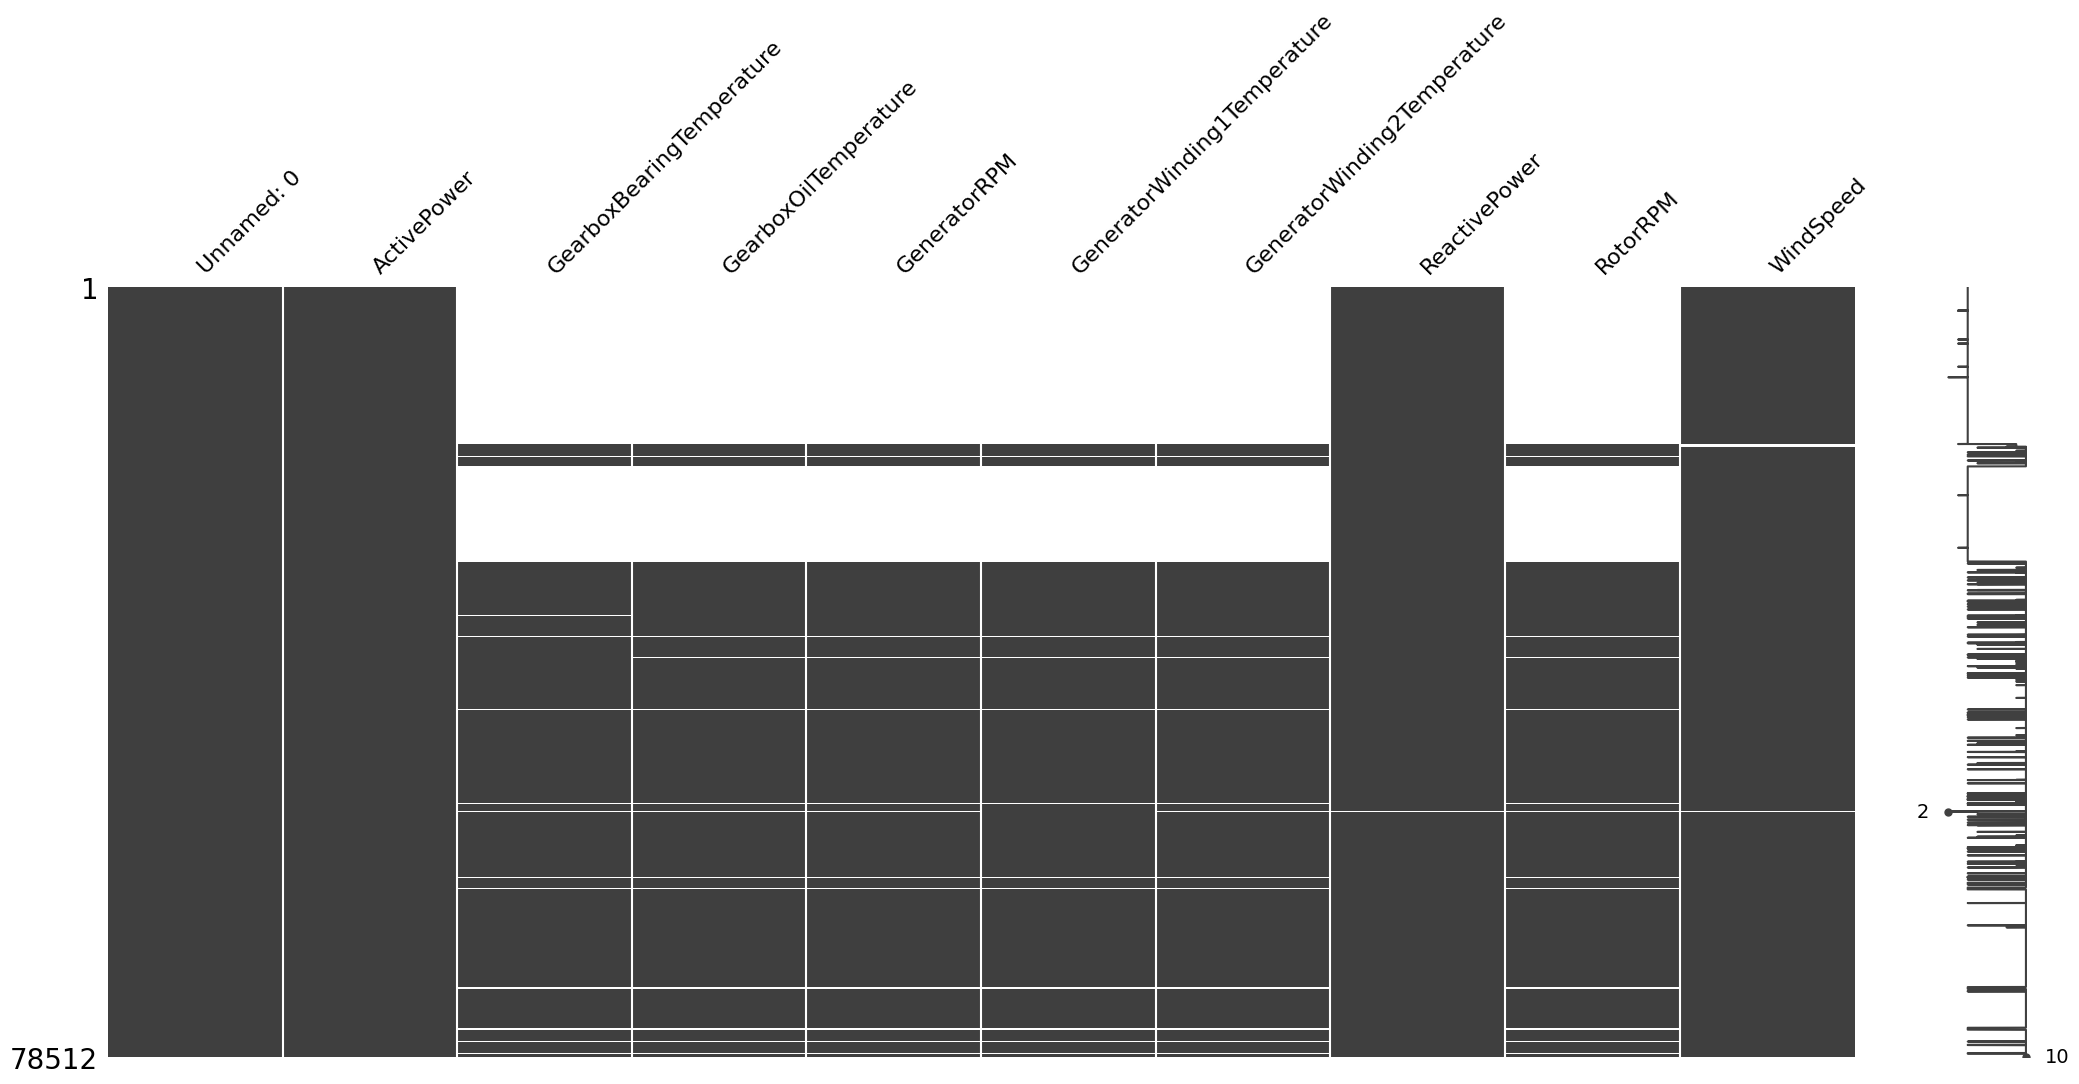

In [19]:
msno.matrix(df_corr)

In [20]:
df_corr.describe()

,ActivePower,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,ReactivePower,RotorRPM,WindSpeed
count,78512.000000,51692.000000,51701.000000,51702.000000,51714.000000,51721.000000,78470.000000,51706.000000,78207.000000
mean,748.374039,67.135237,59.175016,1297.061368,77.031626,76.368452,108.563922,11.635430,6.524237
std,594.505962,8.122908,5.056056,314.615892,21.762844,21.834907,118.221505,2.809943,2.380791
min,0.000012,0.000000,0.000000,0.000000,0.000000,0.000000,-203.182591,0.000000,1.970000
25%,230.948641,61.806819,55.647872,1031.647202,59.919486,59.135475,0.767809,9.251024,4.710195
50%,561.949096,66.621093,58.183527,1237.306035,69.888509,69.152771,64.105782,11.094375,6.122333
75%,1280.479382,72.848891,62.567576,1596.156705,92.968309,92.483332,182.335920,14.311664,7.957361
max,1779.032433,82.237932,70.764581,1809.941700,126.773031,126.043018,403.713620,16.273495,22.970893


In [21]:
# date-time feature extraction
df_corr["day"] = df_corr["Unnamed: 0"].dt.day
df_corr["month"] = df_corr["Unnamed: 0"].dt.month
df_corr["year"] = df_corr["Unnamed: 0"].dt.year
df_corr["hour"] = df_corr["Unnamed: 0"].dt.hour
df_corr["minute"] = df_corr["Unnamed: 0"].dt.minute

/tmp/ipykernel_18/2644816695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr["day"] = df_corr["Unnamed: 0"].dt.day
/tmp/ipykernel_18/2644816695.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr["month"] = df_corr["Unnamed: 0"].dt.month
/tmp/ipykernel_18/2644816695.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [22]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78512 entries, 182 to 118223
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   Unnamed: 0                    78512 non-null  datetime64[ns, UTC]
 1   ActivePower                   78512 non-null  float64            
 2   GearboxBearingTemperature     51692 non-null  float64            
 3   GearboxOilTemperature         51701 non-null  float64            
 4   GeneratorRPM                  51702 non-null  float64            
 5   GeneratorWinding1Temperature  51714 non-null  float64            
 6   GeneratorWinding2Temperature  51721 non-null  float64            
 7   ReactivePower                 78470 non-null  float64            
 8   RotorRPM                      51706 non-null  float64            
 9   WindSpeed                     78207 non-null  float64            
 10  day                           78512 

In [23]:
df_corr.head()

,Unnamed: 0,ActivePower,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,ReactivePower,RotorRPM,WindSpeed,day,month,year,hour,minute
182,2018-01-01 06:20:00+00:00,26.212347,NaN,NaN,NaN,NaN,NaN,3.976499,NaN,3.042750,1,1,2018,6,20
184,2018-01-01 06:40:00+00:00,59.632658,NaN,NaN,NaN,NaN,NaN,11.091660,NaN,3.424814,1,1,2018,6,40
185,2018-01-01 06:50:00+00:00,40.889650,NaN,NaN,NaN,NaN,NaN,4.234497,NaN,3.507172,1,1,2018,6,50
208,2018-01-01 10:40:00+00:00,34.398111,NaN,NaN,NaN,NaN,NaN,5.347792,NaN,3.442212,1,1,2018,10,40
216,2018-01-01 12:00:00+00:00,29.797653,NaN,NaN,NaN,NaN,NaN,6.022326,NaN,3.031363,1,1,2018,12,0


In [24]:
df = df_corr.drop("Unnamed: 0",axis=1)

# TASK 3 : Split Data and Modeling

In [25]:
#Base model
X_train  = df.iloc[:62767].drop("ActivePower",axis=1)
X_test = df.iloc[62767:].drop("ActivePower",axis=1)
y_train = df.iloc[:62767]["ActivePower"]
y_test = df.iloc[62767:]["ActivePower"]

In [26]:
model = xgb.XGBRegressor()

In [27]:
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [28]:
y_pred = model.predict(X_test)

In [29]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error
print("mean_squared_error : {}".format(mean_squared_error(y_pred,y_test)))
print("mean_absolute_error : {}".format(mean_absolute_error(y_pred,y_test)))
print("r2_score : {}".format(r2_score(y_pred,y_test)))
print("mean_absolute_percentage_error : {}".format(mean_absolute_percentage_error(y_pred,y_test)))

mean_squared_error : 4869.681663072221
mean_absolute_error : 19.920588572715566
r2_score : 0.9751961806150455
mean_absolute_percentage_error : 0.07555630769682226


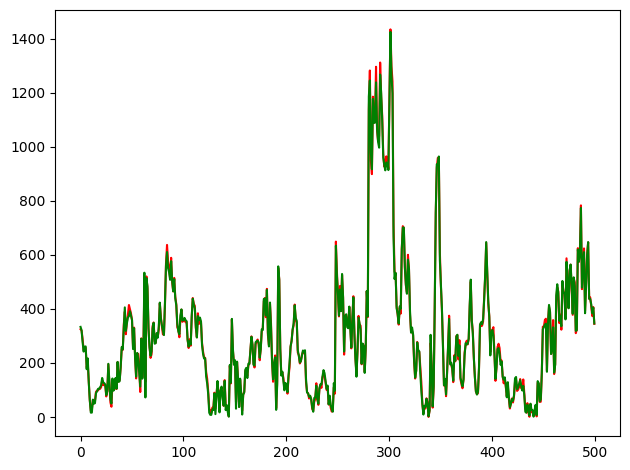

In [30]:
plt.plot(range(500),y_pred[:500],color="red",label="prediction")
plt.plot(range(500),y_test[:500],color="green",label="réel")
plt.tight_layout()

<BarContainer object of 13 artists>

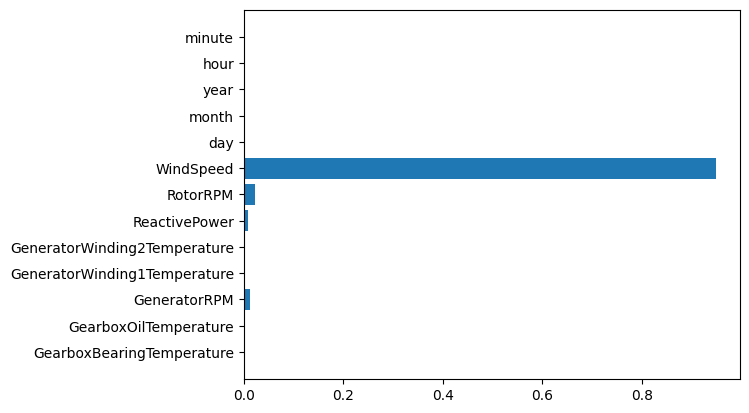

In [31]:
plt.barh(X_train.columns,model.feature_importances_)

## Now i'm filling with the median which is the nan values of df columns. And then building model with this df.

In [32]:
fill = ['GearboxBearingTemperature','GearboxOilTemperature', 'RotorRPM','GeneratorRPM', 'GeneratorWinding1Temperature','GeneratorWinding2Temperature', 'ReactivePower', 'WindSpeed']

In [33]:
df.head()

,ActivePower,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,ReactivePower,RotorRPM,WindSpeed,day,month,year,hour,minute
182,26.212347,NaN,NaN,NaN,NaN,NaN,3.976499,NaN,3.042750,1,1,2018,6,20
184,59.632658,NaN,NaN,NaN,NaN,NaN,11.091660,NaN,3.424814,1,1,2018,6,40
185,40.889650,NaN,NaN,NaN,NaN,NaN,4.234497,NaN,3.507172,1,1,2018,6,50
208,34.398111,NaN,NaN,NaN,NaN,NaN,5.347792,NaN,3.442212,1,1,2018,10,40
216,29.797653,NaN,NaN,NaN,NaN,NaN,6.022326,NaN,3.031363,1,1,2018,12,0


In [34]:
for col in fill:
    df[col].fillna(df[col].median(), inplace=True)

<Axes: >

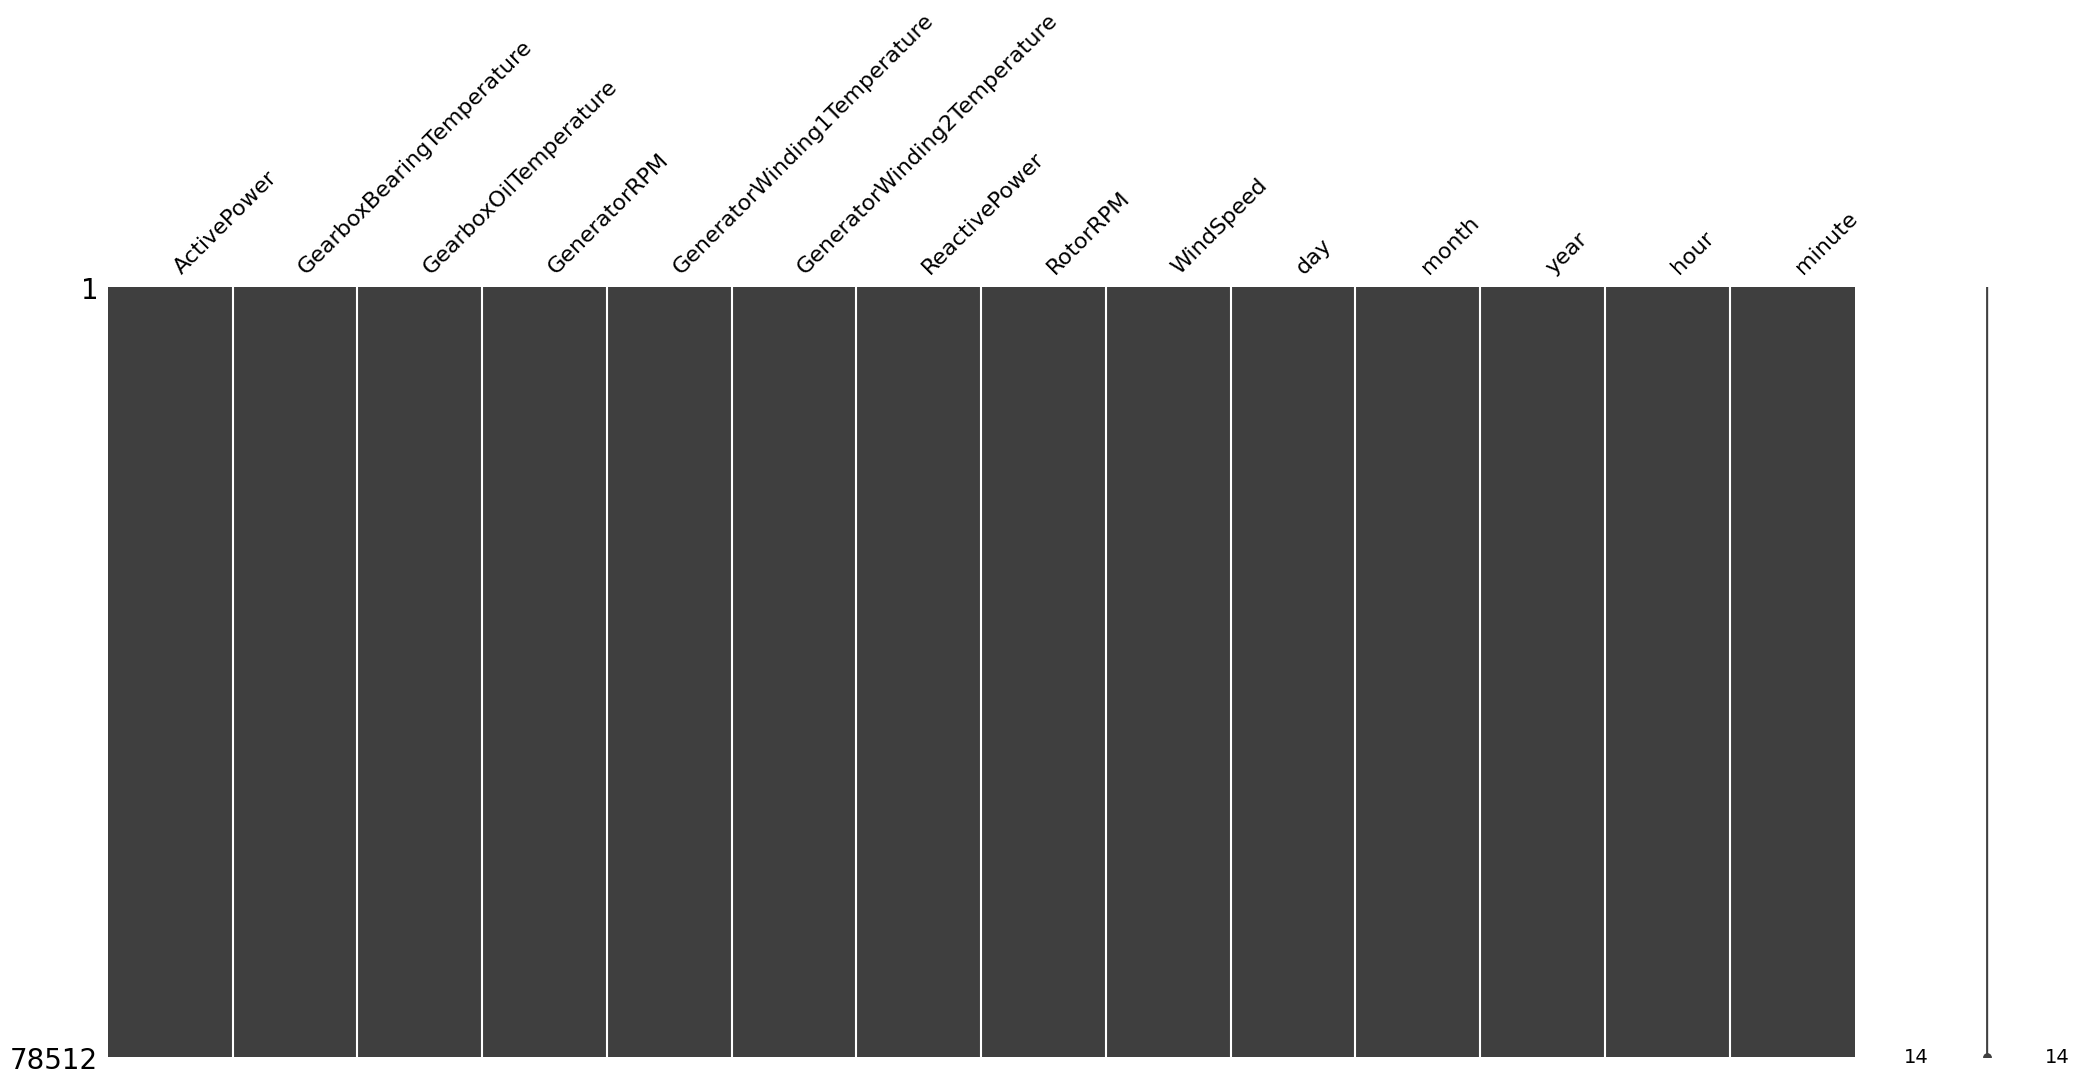

In [35]:
msno.matrix(df)

In [36]:
#Second model
X_train  = df.iloc[:62767].drop("ActivePower",axis=1)
X_test = df.iloc[62767:].drop("ActivePower",axis=1)
y_train = df.iloc[:62767]["ActivePower"]
y_test = df.iloc[62767:]["ActivePower"]

In [37]:
model = xgb.XGBRegressor()

In [38]:
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [39]:
y_pred = model.predict(X_test)

In [40]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error
print("mean_squared_error : {}".format(mean_squared_error(y_pred,y_test)))
print("mean_absolute_error : {}".format(mean_absolute_error(y_pred,y_test)))
print("r2_score : {}".format(r2_score(y_pred,y_test)))
print("mean_absolute_percentage_error : {}".format(mean_absolute_percentage_error(y_pred,y_test)))

mean_squared_error : 6476.968061613465
mean_absolute_error : 28.470925362161772
r2_score : 0.9663258963624453
mean_absolute_percentage_error : 0.0986470318936088


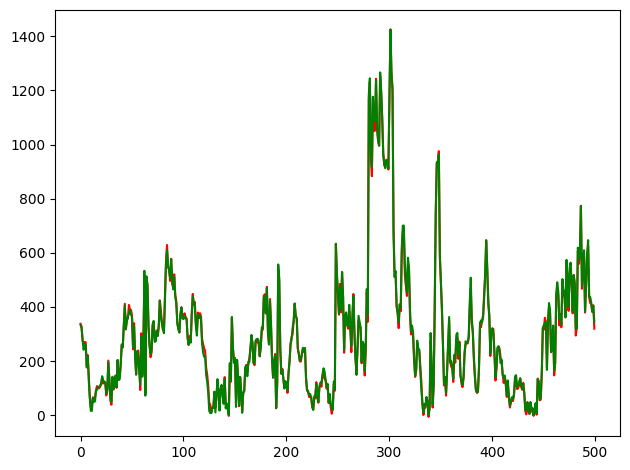

In [41]:
plt.plot(range(500),y_pred[:500],color="red",label="prediction")
plt.plot(range(500),y_test[:500],color="green",label="réel")
plt.tight_layout()

<BarContainer object of 13 artists>

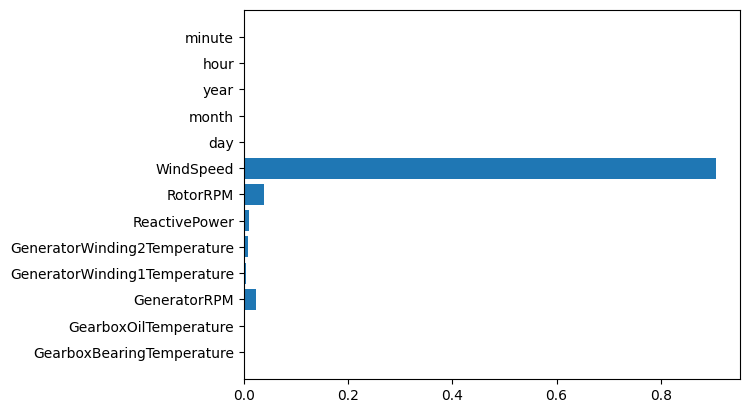

In [42]:
plt.barh(X_train.columns,model.feature_importances_)

In [43]:
# After this step our aim is strong correlation between "ActivePower" and the other df.columns (more than 0.9)
df = df[['ActivePower', 'GearboxBearingTemperature', 'GearboxOilTemperature',
       'GeneratorRPM', 'GeneratorWinding1Temperature',
       'GeneratorWinding2Temperature', 'WindSpeed','RotorRPM', 'day',
       'month', 'year', 'hour', 'minute']]

In [44]:
X_train  = df.iloc[:62767].drop("ActivePower",axis=1)
X_test = df.iloc[62767:].drop("ActivePower",axis=1)
y_train = df.iloc[:62767]["ActivePower"]
y_test = df.iloc[62767:]["ActivePower"]

In [45]:
model = xgb.XGBRegressor()

In [46]:
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [47]:
y_pred = model.predict(X_test)

In [48]:
print("mean_squared_error : {}".format(mean_squared_error(y_pred,y_test)))
print("mean_absolute_error : {}".format(mean_absolute_error(y_pred,y_test)))
print("r2_score : {}".format(r2_score(y_pred,y_test)))
print("mean_absolute_percentage_error : {}".format(mean_absolute_percentage_error(y_pred,y_test)))

mean_squared_error : 1732.8068031524238
mean_absolute_error : 27.093661055261236
r2_score : 0.9918328263427315
mean_absolute_percentage_error : 0.10907880387664434


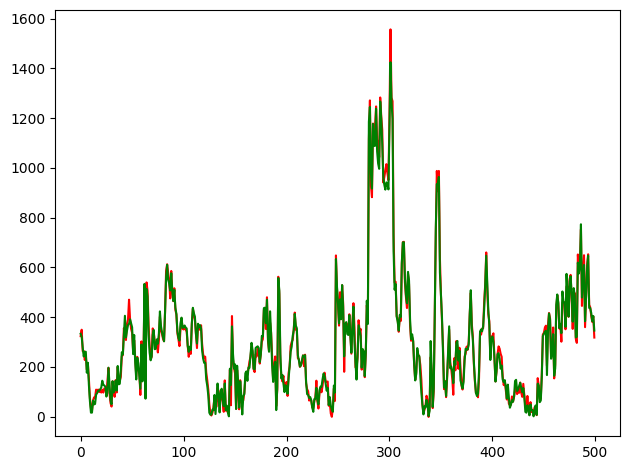

In [49]:
plt.plot(range(500),y_pred[:500],color="red",label="prediction")
plt.plot(range(500),y_test[:500],color="green",label="réel")
plt.tight_layout()

<BarContainer object of 12 artists>

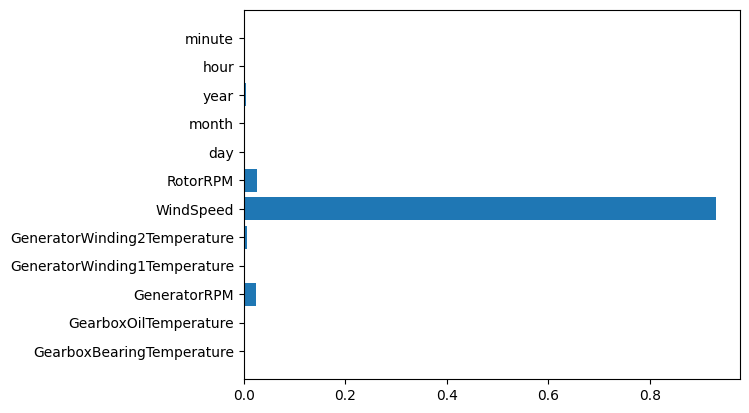

In [50]:
plt.barh(X_train.columns,model.feature_importances_)

When comparing XGBRegressor models according to the given metrics:
* Model 1:
Mean squared error (MSE): 4869.6817
Mean absolute error (MAE): 19.9206
R-squared score: 0.9752
Mean absolute percentage error (MAPE): 0.0756

* Model 2:
MSE: 6476.9681
MAE: 28.4709
R-squared score: 0.9663
MAPE: 0.0986

* Model 3:
MSE: 1732.8068
MAE: 27.0937
R-squared score: 0.9918
MAPE: 0.1091

For all three models, lower mean squared error (MSE) and higher R-squared score (r2_score) represent better performance. In comparison:
* Model 3 has the lowest mean squared error and the highest R-squared score, which indicates that it performs generally better.
* Model 1 has the lowest values in terms of mean absolute error and mean absolute percentage error, which indicates that it performs well in addition to other metrics.
* Model 2 exhibits the lowest performance compared to the other two models.
In conclusion, Model 3 performs generally the best, while Model 1 also performs well. Our most important feature in all models has been 'WindSpeed'.

### [The work in this repo is inspired by @Idir ABDELLI](https://www.kaggle.com/code/liambrigs/wind-power-forecasting-xgb)